# Практическая работа №1 - Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр.9304 Ковалёв Павел, вариант 29

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

**1.**
Бинарный метод - метод возведения числа $x$ в степень $n$. Метод заключается в представлении числа $x$ в бинарном виде. В бинарной записи числа отбрасывается самая первая единица, после чего, в случае если текущий бит - единица, то промежуточный результат вовзводится в квадрат и умножается на $x$, в противном случае - возводится в квадрат.

**2.**
Метод множителей - метод возведения числа $x$ в степень $n$. Метод заключается в том, что сначала число $n$ раскладывается на произведение двух множителей ($n = i \cdot j$), один из которых - наименьший простой делитель числа $n$. После чего, с помощью бинарного метода число $x$ возводится в степень $i$, после чего полученный промежуточный результат возводится в степень $j$.

**3.**
Аддитивная цепочка - последоватеьность чисел $1 = a_0, a_1, a_2, ..., a_m = n$ для некоторого числа $n$, которая обладает свойством $a_i = a_j + a_k$, $k <= j < i$ для любого $i \in \{1...m\}$. Наименьшая длина аддитивной цепочки обозначается за $l(n)$. Оценку сверху дает бинарный метод: $l(n) <= \lambda (n) + \nu (n) - 1$, где $\lambda (n) = \lambda (\lfloor{}n/2\rfloor{}) + 1, \text{if } n = 1$ и $\lambda (n) = 0, \text{else}$. $\nu (n)$ - вес Хэмминга, он равен количеству единиц в бинарной записи числа.

**4.**
Звездная цепочка - аддитивная цепочка, которая состоит только из звёздных шагов. Шаг аддитивной цепочки - $a_i = a_j + a_k$ для любого $i \in \{1...m\}, 0 <= k <= j <= i$. Шаг называется звездным тогда, когда $j = i - 1, k \in [0, i - 1]$. Иными словами, звёздный шаг - такой шаг, когда один из элементов равен предыдущему, а другой - любой из предыдущих.

**5.**
Алгоритм Брауэра - алгоритм вычисления приближенных аддитивных цепочек. Цепочки, вычисленные этим алгоритмом называются Брауэрскими и задаются следующей рекурентной формулой: $\begin{cases} 1,2,3,...,2^k-1,\ if \ \ n < 2^k\\ B_k(q),2q,4q,8q,...,2^kq,n, \ if \ \ n\ge2^k \ и \ q=\lfloor n/2^k \rfloor\end{cases}$. Сложность алгоритма - $log_2(n) + \cfrac{(1+\text{o}(1))log_2(n)}{log_2(log_2(n))}$.

**6.**
Алгоритм дробления вектора индексов - алгоритм, который при помощи полного перебора находит минимальную аддитивную цепочку для числа $n$. Пусть дано $n \in \mathbb{N}$ и требуется найти $l*(n) = m - 1$, $a_m = n$. Представим $n = \sum_{i=1}^{s}2^{k_i}$, а длина аддитивной цепочки для данного $n$ лежит в пределах $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$, где $\underline{l}(n) = \lceil log_2(b) \rceil$, а $\overline{l}(n) = \lambda(n) + \nu(n) - 1$. Рассмотрив вектор индексов следующего вида: $\{r_i\}_{i=1}^q \cup \{\rho\}_{j=q+1}^m, \rho_j = \{x:1 <= x <= j\}$. $r_i$ - фиксированный вектор, $\rho_i$ - меняющийся вектор. Наимбольший $a_m= a_{max}$ достигается для вектора индексов вида $\{r_i\}_{i=1}^q \cup \{q+1, q+2,...,m\}\}$, а наименьший $a_m= a_{min}$ при $\{r_i\}_{i=1}^q \cup \{1, 1,...,1\}\}$, длина $\{1, 1,...,1\}$ равна $m-q$. Зная $a_{q+1}$ имеем, что $a_{max}=a_{q+1}\cdot 2^{m-q}$ и $a_{min}=a_{q+1}+ m - q$. Сам алгоритм дробления вектора индексов следующий:

П.1 - Внешний цикл по длинам цепочек, выбираем $q = m/2$.

П.2 - Внутренний цикл перебора фиксированных частей вектора индексов, на каждом шаге строим звёздную цепочку и вычисляем $a_{min}$, $a_{max}$.

П.2.1 - Если $a_m == n$ - алгоритм завершает работу.

П.2.2 - Если число $n$ находится вне отрезка $[a_{min}, a_{max}]$, то переходим к следующему набору фиксированного вектора индексов.

П.2.3 - Если число $n$ находится внутри отрезка $[a_{min}, a_{max}]$, то начинаем перебирать меняющийся вектор.

П.2.3.1 - В случае если $a_m$ построенной звёздной цепочки равно $n$, то алгоритм звершает работу.

П.2.3.2 - Если $\rho_j = 1$ для любого $j$, то следует переход к следующему фиксированному вектору

П.3 - Если для любых $i, j$ имеем $r_i =1, \rho_j = 1$, то увеличиваем $m$ на 1. 

**7.**
Гипотеза Шольца-Брауэра для звездной цепочки заключается в том, что $l^*(n^2-1)\le l^*(n)+n-1$, где $l^*(n)$ - длина минимальной аддитивной цепочки для числа n.

**8.**
Теорема Брауэра - . При некотором $ k < \log_2(log_2(n))n $ справедливо неравенство: $ l(n) < (1+k^{-1}\lceil{}log_2(n)\rceil{} + 2^{k-1} - k + 2$. При $k = \lambda(\lambda(n)) - 2\cdot \lambda(\lambda(\lambda(n)))$ получаем 2 следствия:

$ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = 1 $.

Одна из наилучших верхних оценок длины аддитивной цепочки имеет вид: $ \lambda(n)(1 + \cfrac{1}{\lambda(\lambda(n))} + \cfrac{\text{o}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^{2}})$.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n = 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n ⩽ 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

**1.
Применить и метод множителей для $x^n$, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.**

Ниже представлена реализация алгоритма бинарного метода, а также примеры работы бинарного метода.

In [21]:
def binary_method(x, n):
    counter = -1
    res = 1
    while(n):
        if n%2 == 1:
            counter += 1
            n = n - 1
            res *= x
            continue
        if n%2 == 0:
            counter += 1
            n = n/2
            x = x*x
            continue
    return [res, counter]

 

Вычисление ${x}^{10}$ с помощью БМ: $x, x\cdot x = x^2, x^2 \cdot x^2 = x^4, x^4 \cdot x = x^5, x^5 \cdot x^5 = x^{10}$.

Вычисление ${x}^{12}$ с помощью БМ: $x, x\cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x^6 = x^{12}$.

Вычисление ${x}^{13}$ с помощью БМ: $x, x\cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x^6 = x^{12}, x^{12} \cdot x = x^{13}$.

Вычисление ${x}^{14}$ с помощью БМ: $x, x\cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x = x^{7}, x^7 \cdot x^7 = x^{14}$.

Вычисление ${x}^{15}$ с помощью БМ: $x, x\cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x = x^{7}, x^7 \cdot x^7 = x^{14}, x^{14} \cdot x = x^{15}$.

Ниже представлена реализация метода множителей, а также примеры работы метода множителей.

In [19]:
def mul_method(x, n):
    ls = list(factor(n))
    if ls[0][0] == n:
        res = mul_method(x, n - 1)
        res[0] *= x
        res[1] += 1
        return res
    i = ls[0][0]
    j = n/i
    y = binary_method(x, i)
    res = binary_method(y[0], j)
    res[1] += y[1]
    return res



Вычисление ${x}^{10}$ с помощью ММ: $ 10 = 2\cdot 5, x, x\cdot x = x^2 = y, y \cdot y = y^2, y^2 \cdot y^2 = y^4, y^4 \cdot y = y^5 = x^{10}$.

Вычисление ${x}^{12}$ с помощью ММ: $ 12 = 2\cdot 6, x, x\cdot x = x^2 = y, y \cdot y = y^2, y^2 \cdot y = y^3, y^3 \cdot y^3 = y^6 = x^{12}$.

Вычисление ${x}^{13}$ с помощью ММ: 13 - простое $x^{13} = x\cdot x^{12}$, $ 12 = 2 \cdot 6 $ $x, x\cdot x = x^2 = y, y \cdot y = y^2, y^2 \cdot y = y^3, y^3 \cdot y^3 = y^6, x\cdot y^6 = x \cdot x^{12} = x^{13}$.

Вычисление ${x}^{14}$ с помощью ММ: $ 14 = 2\cdot 7, x, x\cdot x = x^2 = y, y \cdot y = y^2, y^2 \cdot y = y^3, y^3 \cdot y^3 = y^6, y^6 \cdot y = y^7 = x^{14}$.

Вычисление ${x}^{15}$ с помощью ММ: $ 15 = 3\cdot 5, x, x\cdot x = x^2, x^2\cdot x = x^3 = y, y \cdot y = y^2, y^2 \cdot y^2 = y^4, y^4 \cdot y = y^5 = x^{15}$.

Далее в таблице представлено число операций, которое было произведено при возведении числа $x$ в степень $n$ бинарным методом и методом множителей соответственно. В качестве числа $x$ было взято число 2, $n \in [31; 50]$.

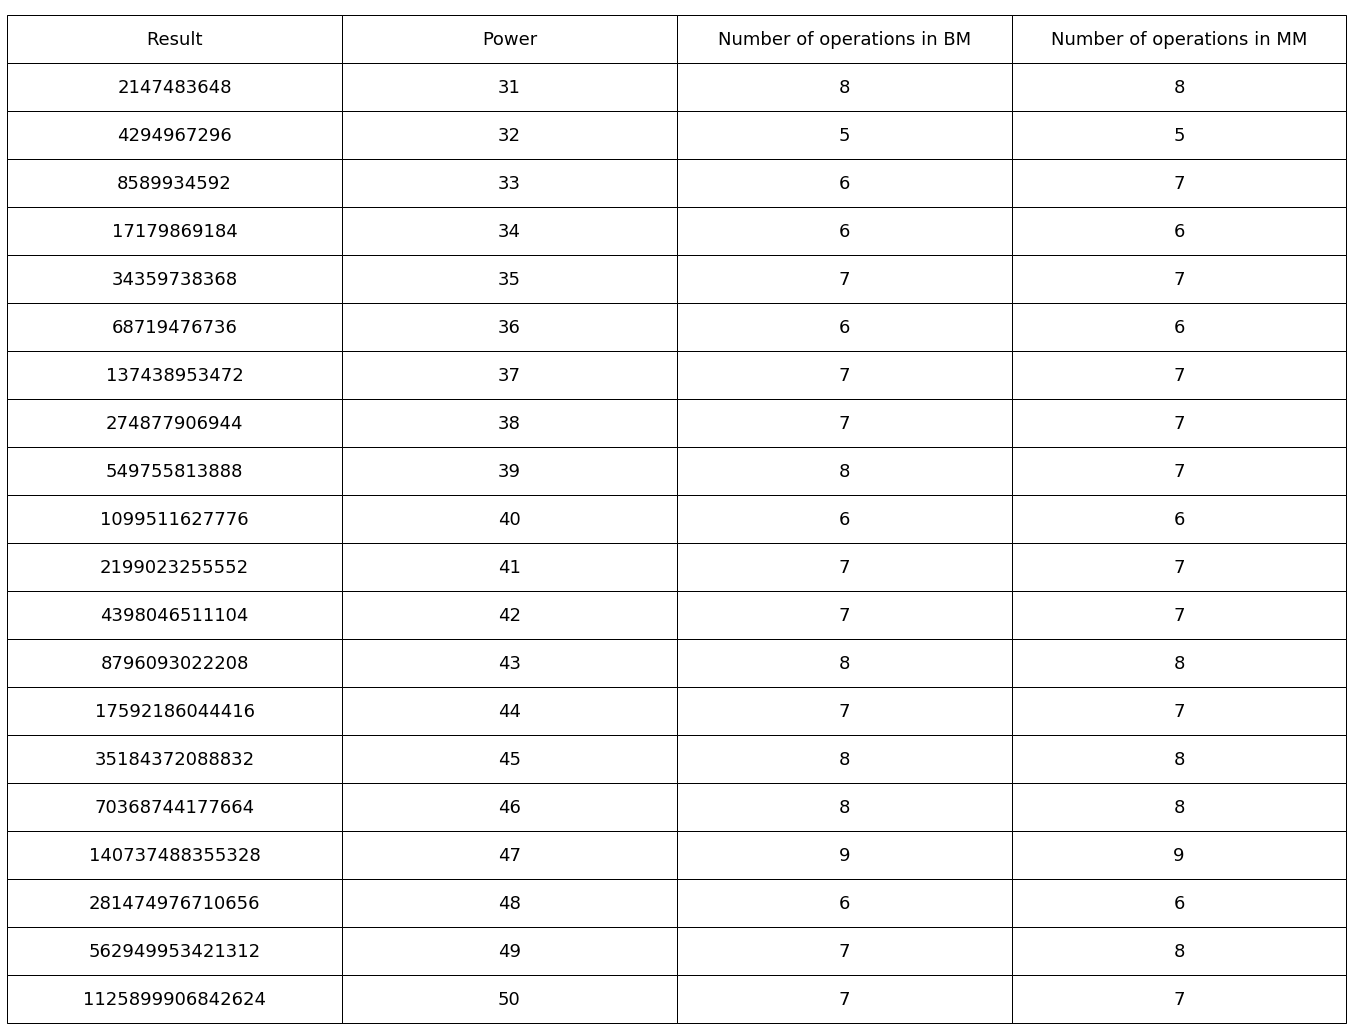

In [23]:
import matplotlib.pyplot as plt

dataset = []
for j in range(20):
    bm_opers = binary_method(2, 31 + j)
    mm_opers = mul_method(2, 31 + j)
    dataset.append([bm_opers[0], 31 + j, bm_opers[1], mm_opers[1]])
    
column_headers = ('Result', 'Power', 'Number of operations in BM', "Number of operations in MM")

fig, axs = plt.subplots()
axs.set_axis_off() 
the_table = axs.table(cellText=dataset, colLabels=column_headers, cellLoc = 'center', loc='upper right')
the_table.set_fontsize(18)
the_table.scale(4,4)
plt.show()

Вывод: метод множителей иногда работает быстрее бинарного метода, однако бывают исключения, например число 33 - методу множителей понадобилось на одну операцию больше чем бинарному методу.

**2.
Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра  k , сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.**

Ниже представлена реализация алгоритма Брауэра.

In [10]:
def brauer_algo(n, k, brauer_chain = ""):
    brauer_chain = []
    if n < 2**k:
        for i in range(1, 2**k):
            brauer_chain.append(i)
    else:
        q = n // 2**k
        brauer_chain = brauer_algo(q, k, brauer_chain)
        for i in range(1, k + 1):
            brauer_chain.append(q*(2**i))
        brauer_chain.append(n)    
    return brauer_chain



Далее в таблице представлены аддитивные цепочки, построенные алгоритмом Брауэра для чисел 45, 56, 67 с варьированием параметра k от 4 до 6.

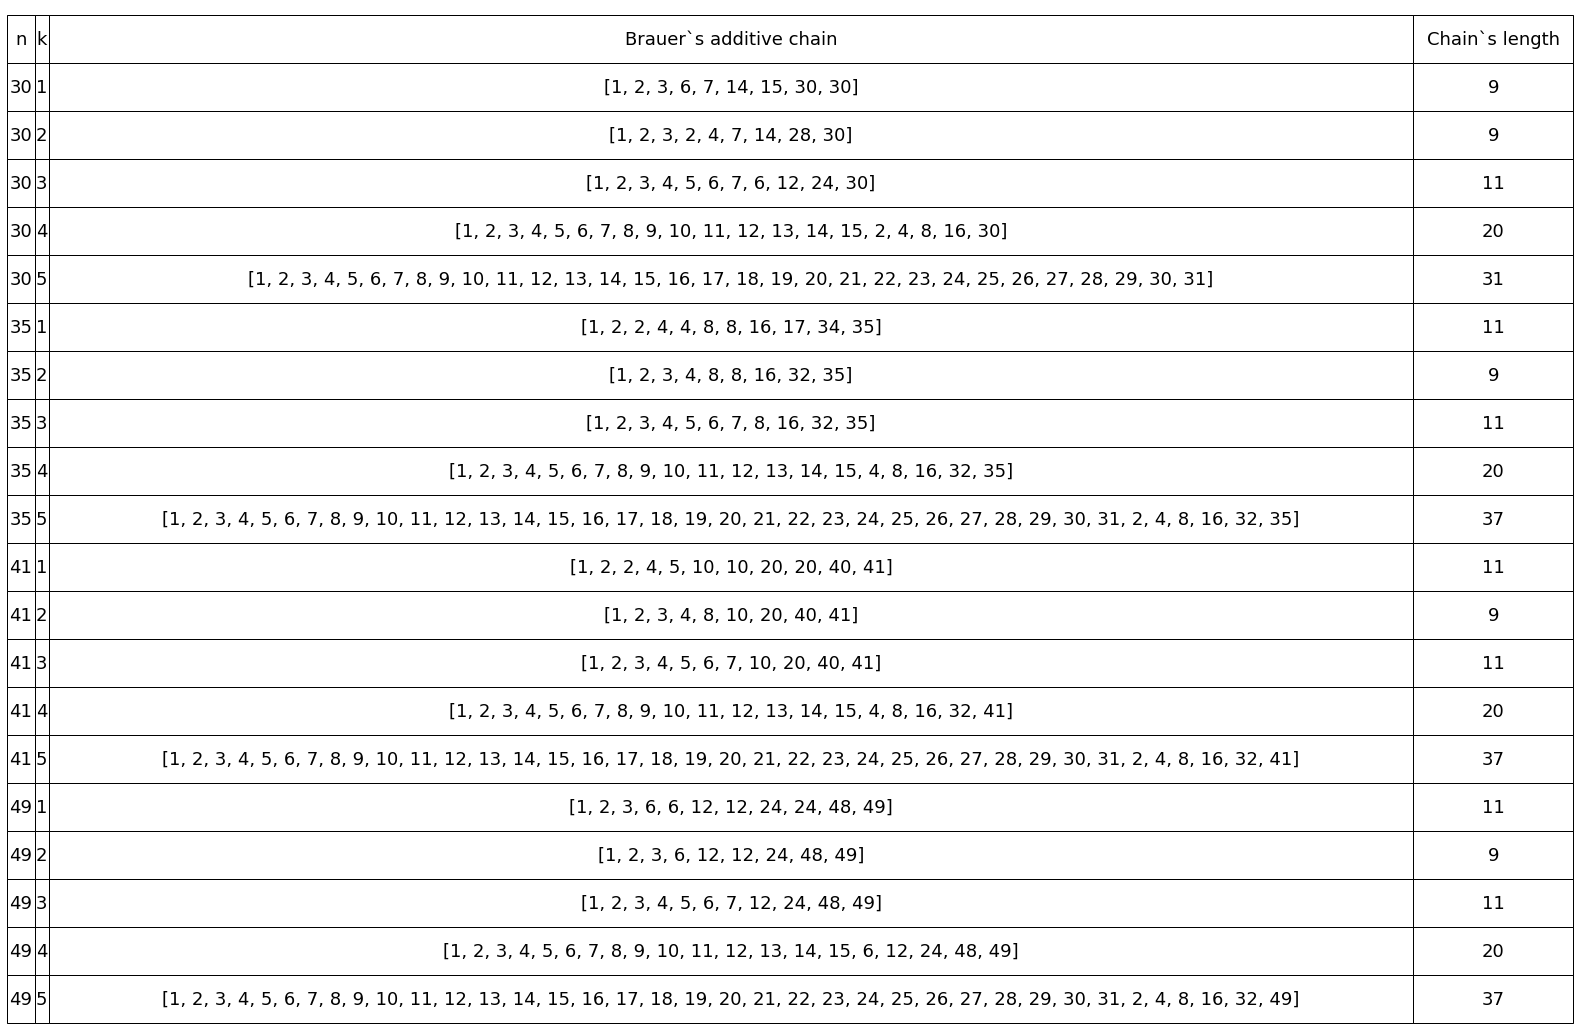

In [15]:
import matplotlib.pyplot as plt

dataset = []

for n in [30, 35, 41, 49]:
    for k in [1, 2 , 3 , 4 ,5]:
        b_chain = brauer_algo(n, k)
        dataset.append([n, k, b_chain, len(b_chain)])
    
column_headers = ('n', 'k', 'Brauer`s additive chain', 'Chain`s length')

fig, axs = plt.subplots()
axs.set_axis_off()

the_table = axs.table(cellText=dataset, colLabels=column_headers, cellLoc = 'center', loc='upper right')
the_table.auto_set_font_size(False)
the_table.auto_set_column_width(col=list(range(4)))
the_table.set_fontsize(18)
the_table.scale(4,4)
plt.show()

Длины кратчайших аддитивных цепочек для чисел 30, 35, 41 и 49 равны соответственно 7, 8, 8 и 8. Алгоритм Брауэра не смог найти цепочки минимальной длины для введенных чисел при разном параметре $k$. Было также замечено, что с ростом $k$ растет и длина аддитивной цепочки, а при k = 2 получается цепочка минимально возможной длины.

**3.
Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.**

In [2]:
def lam(a):
    if a != 1:
        return (lam(a//2) + 1)
    return 0
 

def nu(a):
    if a != 1:
        return (nu(a//2) + a%2)
    return 1


def l_up(a):
    return lam(a) + nu(a) -1
 

def make_star_chain(fixed_vi, unfixed_vi):
    star_chain = [1]
    for i in fixed_vi:
        star_chain.append(star_chain[-1] + star_chain[i - 1])
    for j in unfixed_vi:
        star_chain.append(star_chain[-1] + star_chain[j - 1])  
    return star_chain
 

def to_new_vec(vi, start):
    max_ind = start + len(vi) - 1
    for i in range(1, len(vi) + 1):
        vi[-i] += 1
        if vi[-i] > max_ind:
            if i == len(vi):
                vi.append(1)
                break
            vi[-i] = 1
            max_ind -= 1
        else:
            break
    return vi       
 

def vector_indexes_splitting(n):
    m = ceil(log(n,2))
    up_border = l_up(n)
    star_chain = []
    while m <= up_border:
        q = m//2
        fixed_vi = [1 for i in range(q)]
        while len(fixed_vi) == q:
            unfixed_vi = [1 for i in range(m - q)]
            star_chain = make_star_chain(fixed_vi, unfixed_vi)
            am = star_chain[-1]
            a_min = star_chain[q] + m - q
            a_max = star_chain[q] * (2**(m-q))
            if am == n:
                return star_chain
            if n < a_min or n > a_max:
                fixed_vi = to_new_vec(fixed_vi, 1)
                continue;
            if n >= a_min and n <= a_max:
                while len(unfixed_vi) == m - q:
                    star_chain = make_star_chain(fixed_vi, unfixed_vi)
                    if star_chain[-1] == n:
                        return star_chain
                    unfixed_vi = to_new_vec(unfixed_vi, q + 1)
                fixed_vi = to_new_vec(fixed_vi, 1)    
        m += 1

        

Далее в таблице представлено тестирование алгоритма дробления вектора индексов для $n > 500$. В процессе тестирования замерялось время, за которое алгоритм находил аддитивную цепочку и вычислялась ее длина. Алгоритм сравнивался с алгоритмом Брауэра.

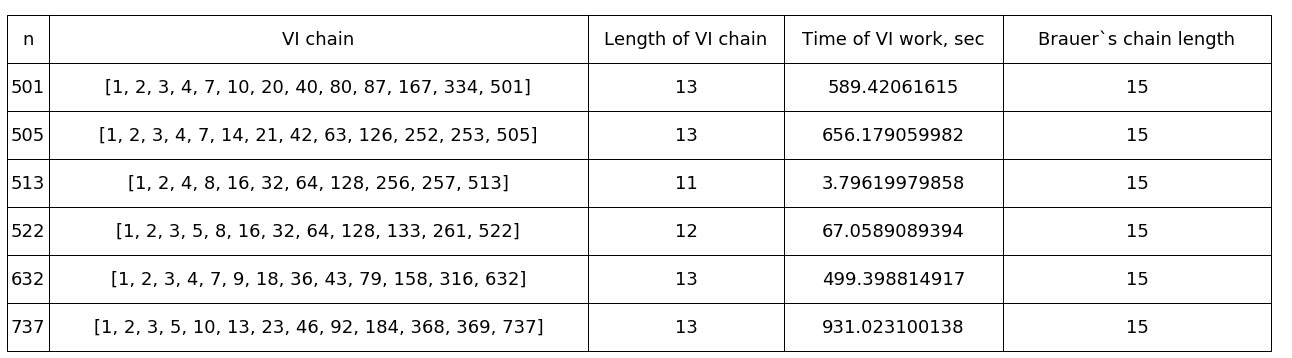

In [11]:
import matplotlib.pyplot as plt
import time

dataset = []
start = time.time()
for n in [501, 505, 513, 522, 632, 737]:
    start = time.time()
    vi_chain = vector_indexes_splitting(n)
    end = time.time()
    dataset.append([n, vi_chain, len(vi_chain), end - start, len(brauer_algo(n, 2))])
    
column_headers = ('n', 'VI chain', 'Length of VI chain', 'Time of VI work, sec', 'Brauer`s chain length')

fig, axs = plt.subplots()
axs.set_axis_off()

the_table = axs.table(cellText=dataset, colLabels=column_headers, cellLoc = 'center', loc='upper right')
the_table.auto_set_font_size(False)
the_table.auto_set_column_width(col=list(range(4)))
the_table.set_fontsize(18)
the_table.scale(4,4)
plt.show()

Как можно видеть, алгоритм дробления вектора индексов получил минимальную аддитивную цепочку для заданных чисел, в отличие от метода Брауэра, однако алгоритм дробления зачастую требует очень много времени работы. Конкретно в данной таблице только на 513 получилось найти цепочку за довольно короткое время, для остальных чисел пришлось ждать от одной минуты до 15.

**4.
Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.**

Сначала программно посчитаем $l(n)$ для $n = 1..200$, после чего с помощью метода наименьших квадратов аппроксимируем полученные данные.

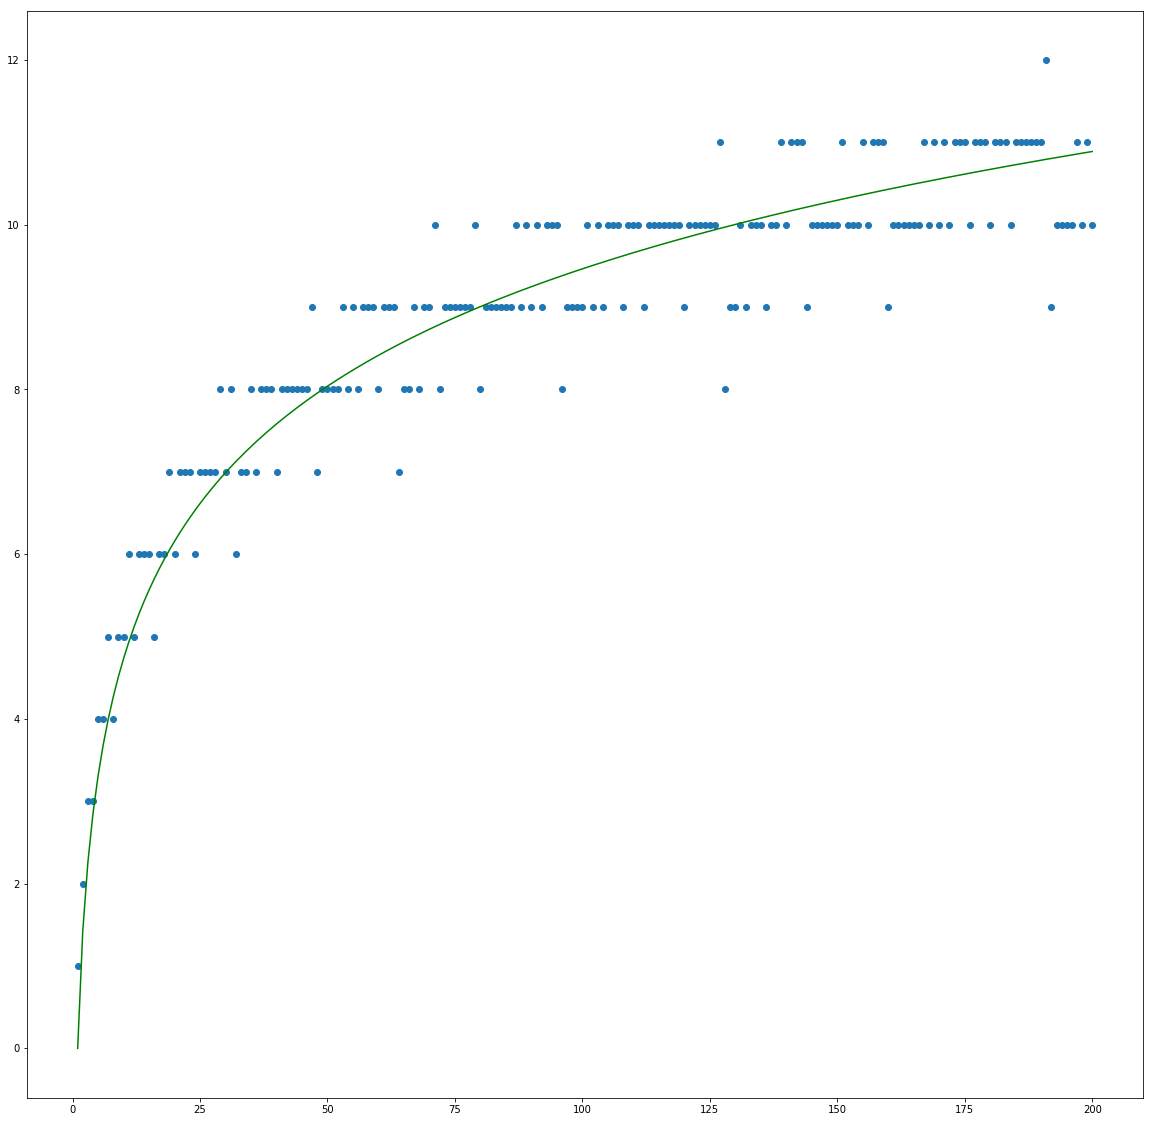

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

def approx(coef, y, x):
    return y - np.log(x)*coef[0]

x = [i for i in range(1, 201)]
y = [len(vector_indexes_splitting(i)) for i in range(1, 201)]



plt.figure(figsize = (20, 20))
solv = leastsq(approx, 1, args = (y, x))
plt.plot(x, y, 'o', x, np.log(x)*solv[0], 'g')
plt.show()

Как можно видеть, наши полученные данные успешно аппроксимируются логарифмической кривой, тем самым подтверждая первое следствие теоремы: $\lim_{n \to +\infty} \cfrac{l(n)}{\lambda{n}} = 1$.

**5.
Проверить гипотезу Шольца–Брауэра для $1< n⩽ 10$ на алгоритме дробления вектора индексов. Сделать выводы.**

Проверим гипотезу, программно посчитав значения каждой части неравенства и приведем их в таблице.

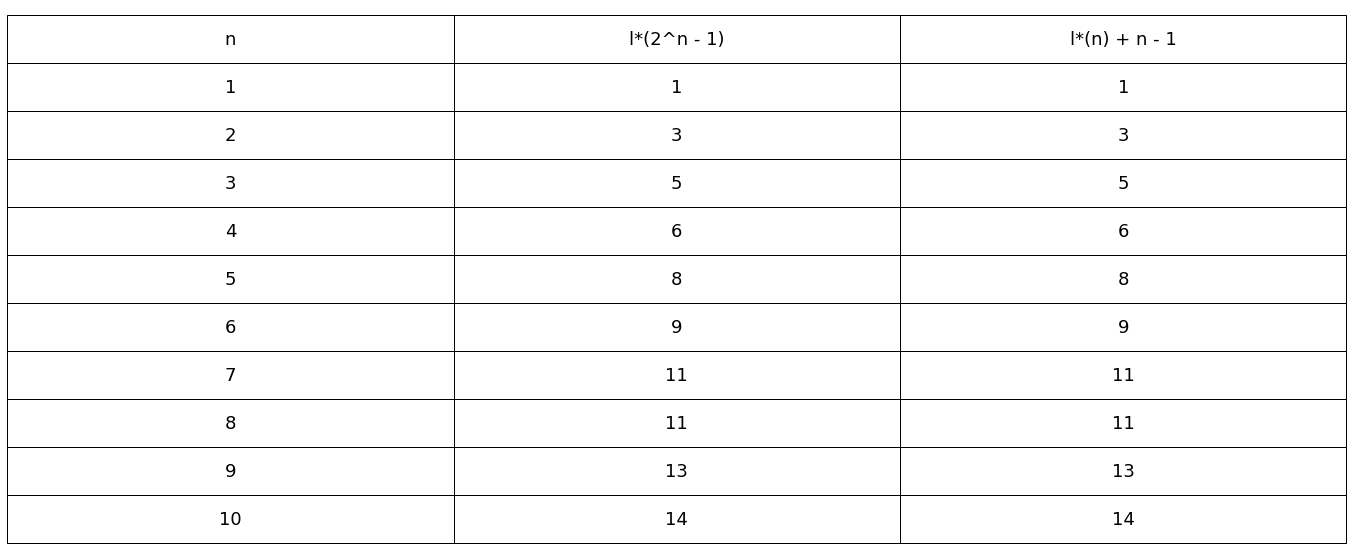

In [12]:
import matplotlib.pyplot as plt

dataset = []
for n in range(1, 11):
    dataset.append([n, len(vector_indexes_splitting(2**n - 1)), len(vector_indexes_splitting(n)) + n - 1])
    
column_headers = ('n', 'l*(2^n - 1)', 'l*(n) + n - 1')

fig, axs = plt.subplots()
axs.set_axis_off() 
the_table = axs.table(cellText=dataset, colLabels=column_headers, cellLoc = 'center', loc='upper right')
the_table.set_fontsize(18)
the_table.scale(4,4)
plt.show()

Как можно видеть из таблицы, гипотеза доказана при $1<n⩽10$. При больших $n$ алгоритм дробления вектора индексов находит аддитивную цепочку за довольно большое время, поэтому дальнейшая проверка весьма времязатратна.

**Вывод.**

В результате практической работы были изучены алгоритмы Брауэра и дробления вектора индексов, понятие аддитивной цепочки, звездной аддитивной цепочки, типы шагов аддитивных цепочек, теорема Брауэра и проверено первое следствие из нее. Также были изучены и успешно реализованы бинарный метод и метод множителей возведения в степень $n$ числа $x$. Также была программно проверена гипотеза Шольца-Брауэра для $n \in [1; 10]$. Все вычисления производились в среде математического пакета SageMath. Было установлено, что алгоритм Брауэра работает быстрее алгоритма дробления вектора индексов, однако он не гарантирует получения звездной аддитивной цепочки, а метод множителей в среднем возводит число в нужную степень за меньшее число операций чем бинарный метод.